# OXFORD-IIIT PET Dataset
# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [8]:
# Image CLASS-ID SPECIES BREED ID
# ID: 1:37 Class ids
# SPECIES: 1:Cat 2:Dog
# BREED ID: 1-25:Cat 1:12:Dog
# All images with 1st letter as captial are cat images while
# images with small first letter are dog images.
df = pd.read_csv('./data/annotations/list.txt',skiprows = 6, delimiter = ' ', header = None)
df.columns = ['filename', 'id', 'species', 'breed']
df

,filename,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [9]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


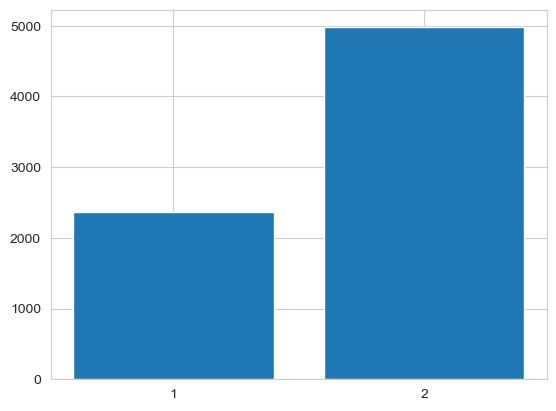

In [17]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

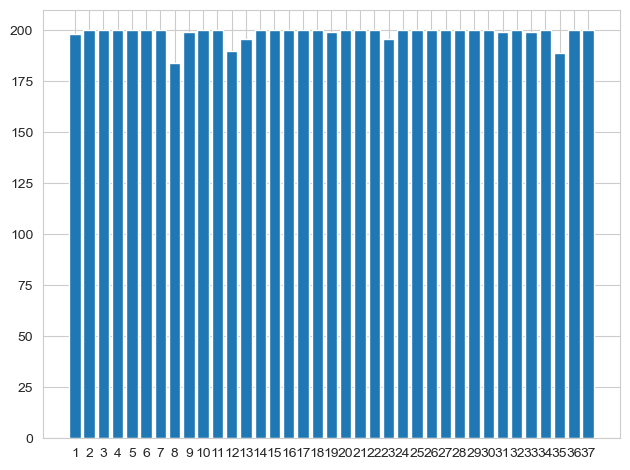

In [19]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.tight_layout()
plt.show()

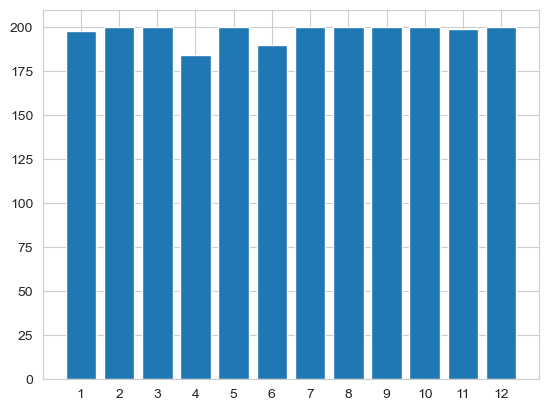

In [20]:
value_counts = df[df['species']==1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

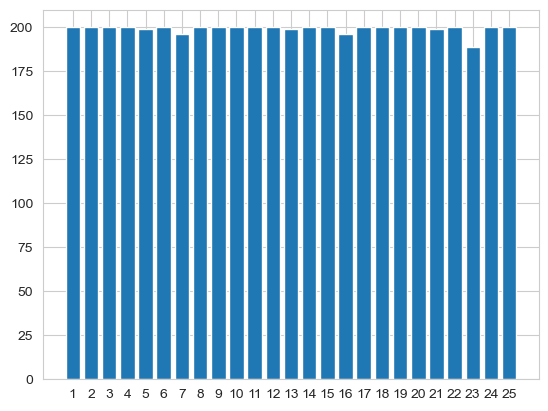

In [21]:
value_counts = df[df['species']==2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

## image file


In [22]:
import os
from glob import glob

In [27]:
image_dir = './data/images/'
bbox_dir = './data/annotations/xmls/'
seg_dir = './data/annotations/trimaps/'

In [24]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [25]:
image_files[:10]

['./data/images/Egyptian_Mau_167.jpg',
 './data/images/pug_52.jpg',
 './data/images/basset_hound_112.jpg',
 './data/images/Siamese_193.jpg',
 './data/images/shiba_inu_122.jpg',
 './data/images/Siamese_53.jpg',
 './data/images/Birman_167.jpg',
 './data/images/leonberger_6.jpg',
 './data/images/Siamese_47.jpg',
 './data/images/shiba_inu_136.jpg']

In [28]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [29]:
seg_files[:10]

['./data/annotations/trimaps/american_pit_bull_terrier_172.png',
 './data/annotations/trimaps/boxer_190.png',
 './data/annotations/trimaps/Sphynx_8.png',
 './data/annotations/trimaps/keeshond_37.png',
 './data/annotations/trimaps/Siamese_5.png',
 './data/annotations/trimaps/Bengal_99.png',
 './data/annotations/trimaps/boxer_184.png',
 './data/annotations/trimaps/keeshond_23.png',
 './data/annotations/trimaps/american_pit_bull_terrier_99.png',
 './data/annotations/trimaps/american_pit_bull_terrier_166.png']

In [31]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [36]:
bbox_files[:10]

['./data/annotations/xmls/British_Shorthair_10.xml',
 './data/annotations/xmls/german_shorthaired_119.xml',
 './data/annotations/xmls/english_setter_158.xml',
 './data/annotations/xmls/Siamese_178.xml',
 './data/annotations/xmls/pomeranian_162.xml',
 './data/annotations/xmls/newfoundland_137.xml',
 './data/annotations/xmls/Siamese_150.xml',
 './data/annotations/xmls/german_shorthaired_131.xml',
 './data/annotations/xmls/english_setter_170.xml',
 './data/annotations/xmls/english_setter_164.xml']

## head ROI 

In [34]:
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 38.5 MB/s eta 0:00:0000:0100:01


In [35]:
import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

<function matplotlib.pyplot.show(close=None, block=None)>

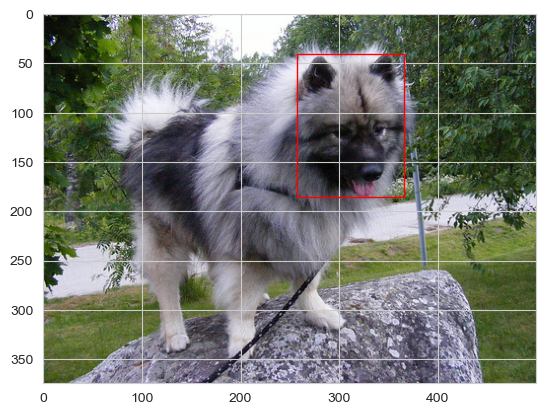

In [39]:
image_path = image_files[110]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# 일반적으로 BGR로 읽어오기 때문에 RGB로 바꿔줘야함

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill = False, color = 'red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show

## segmap

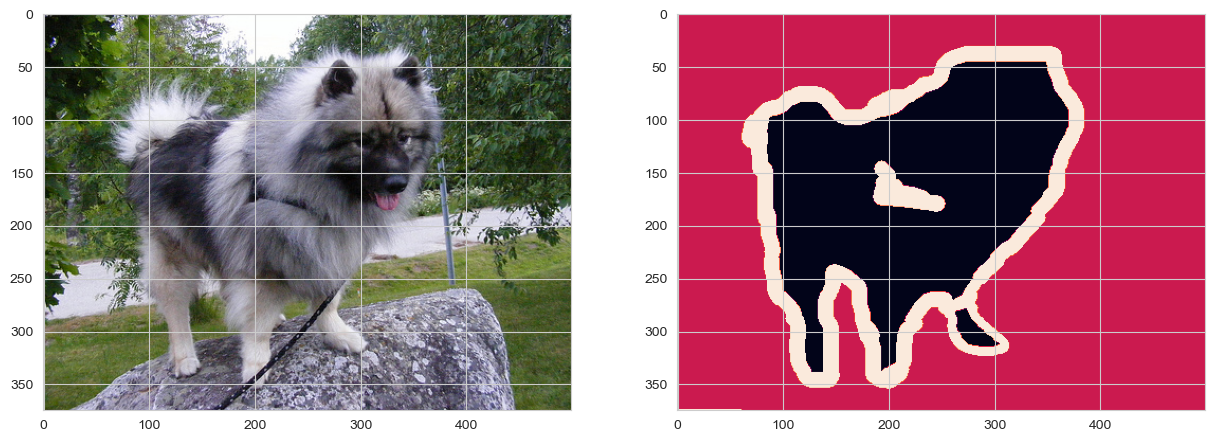

In [43]:
image_path = image_files[110]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)

plt.show()

## 데이터 분할

In [44]:
from sklearn.model_selection import KFold

In [49]:
kf = KFold(n_splits = 5, shuffle = True, random_state =42)

df['fold'] =-1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] =idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [52]:
print(len(df[df['fold']==1]))
print(len(df[df['fold']!=1]))

1470
5879


In [51]:
df

,filename,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,4
2,Abyssinian_102,1,1,1,4
3,Abyssinian_103,1,1,1,5
4,Abyssinian_104,1,1,1,5
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,2
7345,yorkshire_terrier_97,37,2,25,1
7346,yorkshire_terrier_98,37,2,25,4
7347,yorkshire_terrier_99,37,2,25,3


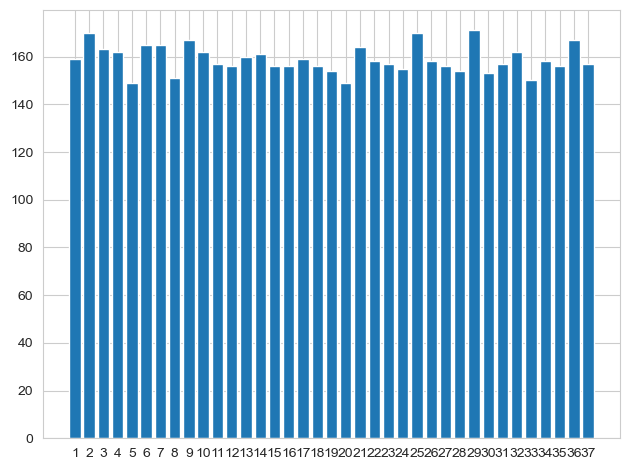

In [53]:
value_counts = df[df['fold']!=5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import StratifiedKFold

In [57]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state =42)
df['fold'] =-1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] =idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


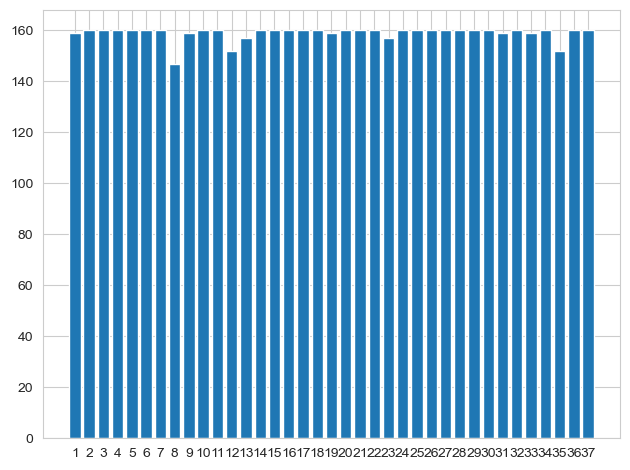

In [58]:
value_counts = df[df['fold']!=5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align = 'center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.tight_layout()
plt.show()

In [59]:
df.to_csv('data/kfolds.csv', index = False)